<a href="https://colab.research.google.com/github/LucasParreirasDS/AwariDS/blob/main/EDA/%5BAWARI_DS_07_02%5D_Pr%C3%A1tica_An%C3%A1lise_Explorat%C3%B3ria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

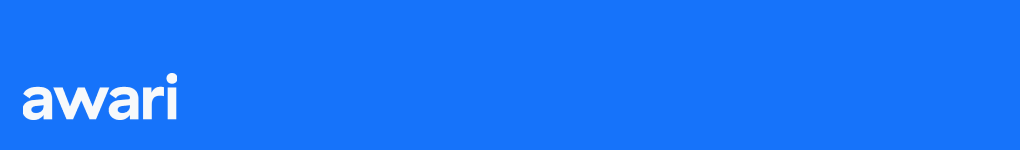

Prática da **Aula 07: Estatística Descritiva I**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

# **Análise Exploratória de Dados**

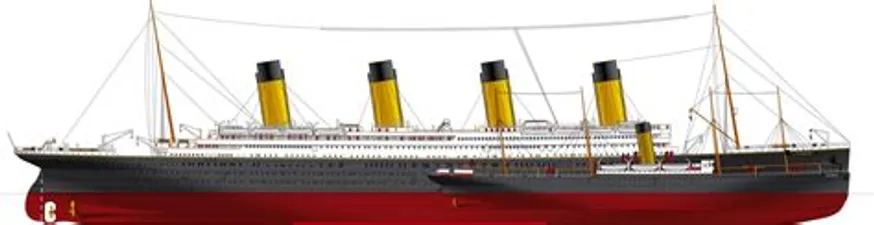

## **Apresentação**

O **naufrágio do Titanic** — mais precisamente, os dados de tripulantes e passageiros — é um prato cheio para análise estatística e Machine Learning.

O conjunto de dados (*dataset*) da tragédia tem até uma competição muito famosa no [Kaggle](https://www.kaggle.com/) (maior comunidade de competições de Data Science do mundo), intitulada [*Titanic - Machine Learning from Disaster*](https://www.kaggle.com/competitions/titanic).

Para se ter ideia, analisar tais dados passou a ser considerado uma espécie de **"Hello, World!"** ("Olá, Mundo!") em Ciência de Dados — se você não sabe, a expressão ["Hello, World!"](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program) costuma ser a primeira coisa que se imprime na tela quando se aprende programação.

## **Objetivo**

Nesta prática de aula, vamos usar o *dataset* do naufrágio do Titanic para demonstrar como é feita uma uma análise de dados, usando **Estatística Descritiva**, do zero.


### **Perguntas que podemos fazer**

A partir da tragédia do Titanic podemos levantar alguns questionamentos e curiosidades que irão direcionar nossas análises:

* Quantos passageiros havia no navio?

* Quantos eram mulheres e quantos eram homens?

* Havia crianças?

* Temos como saber de onde partiram?

* Em quais classes (divisões do navio) havia mais pessoas?

Ao longo do curso, veremos que essas perguntas podem ser estendidas para predizermos (com uso de Machine Learning) qual a probabilidade de uma pessoa sobreviver com base em suas características e status.

No [página do Kaggle](https://www.kaggle.com/c/titanic), podemos encontrar a descrição completa do desafio e os conjuntos de dados a serem utilizados, se necessário.

## **Prática**

### **Preparativos**

Para este exercício, iremos importar as seguintes bibliotecas Python:

- *pandas* (para manipular dados);
- *matplotlib.pyplot* (para plotar gráficos);
- *seaborn*  (que auxilia no trabalho com gráficos).

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
paleta_cores = ["#34495e", "#5497B0", "#89B7D0"] #configura cores dos gráficos
sns.set(style = "dark", palette = paleta_cores, color_codes = True) # configura outros parâmetros visuais

### **Importação dos dados**

Os dados necessários para a análise e construção da nossa demonstração foram baixados do Kaggle e estão armazenados no [Github](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv) (maior repositório de códigos do mundo) de terceiros.

Por meio do Pandas, iremos importar um arquivo CSV (formato simples, que pode até ser gerado via Excel) com esses dados

In [2]:
# Importando o arquivo CSV
arquivo = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Vamos usar o **Pandas** para carregar o CSV em um DataFrame (algo similar a uma "tabela"), para podermos manipulá-los:

In [3]:
# Dados carregados em memória como DataFrame
df = pd.read_csv(arquivo)

Vamos visualizar os dados carregados:

In [4]:
# Exibindo dados carregados no Dataframe
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### **Análise Exploratória**

As principais informações e respostas para perguntas iniciais podem ser obtidas através da análise exploratória dos dados.

Além disso, como veremos mais à frente no curso, o desempenho dos modelos de Machine Learning dependem diretamente desta etapa do projeto.

Usando Pandas, poderemos importar e visualizar os conjuntos de dados:

In [5]:
# Visualização das 10 primeiras linhas

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### **Compreendendo as variáveis**

Para acompreender as variáveis do conjunto de dados, podemos contar com o auxílio de um dicionário disponibilizado junto do dataset, no Kaggle:

* **PassengerID:** Número de identificação do passageiro
* **Survived:** Informa se o passageiro sobreviveu ao naufrágio
 * 0 = não
 * 1 = sim
* **PCclass:** Classe do bilhete
 * 1 = 1ª classe
 * 2 = 2ª classe
 * 3 = 3ª classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de cônjuges e/ou irmãos a bordo
* **Parch:** Quantidade de pais e filhos a bordo
* **Ticket:** Número da passagem
* **Fare:** Preço da passagem
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Porto de embarque
 * C = Cherbourg
 * Q = Queenstown
 * S = Southampton

Conhecendo essas variáveis, podemos começar nossas análises.

### **Contando entradas por variáveis**

Se quiser saber quantas entradas temos para cada uma de nossas variáveis (um outro nome para ela elas é "atributos"), podemos fazer:

In [6]:
# A função count() conta as variáveis de um DataFrame
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Podemos observar acima que temos todas variáveis preenchidas para **891 linhas** do DataFrame e que algumas não possuem todas as amostras (Age, Cabin e Embarket).

Rodando outro método de Pandas, podemos ver os tipos dos nossos dados:

In [7]:
# A função dtypes mostra os tipos de variáveis
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

O conjunto de dados contém **7 variáveis numéricas** (dos tipos *int64* e *float64*) e **5 do tipo *object*** (*strings*).

Apenas três variáveis possuem valores ausentes:

* **Cabin:** 687 entradas ausentes;
* **Age:** 177 entradas ausentes; e
* **Embarked:** 2 entradas ausentes.

Entre essas variáveis, a que pode apresentar mais problemas ao implementarmos um modelo de Machine Learning, por exemplo, é `Age`, uma vez que corresponde a características diretas dos passageiros, sendo um dado fundamental durante a análise exploratória.

Vamos ver que poderemos tratar essesou remover  valores ausentes mais adiante no curso.

### **Analisando medidas estatísticas**

#### **Valores médios, máximos e mínimos**

Podemos achar a média dos nossos por meio da função *mean()*, para cara uma das variáveis do nosso DataFrame:

In [8]:
# média de idade dos passageiros
df['Age'].mean()

29.69911764705882

In [9]:
# media do valor da tarifa
df['Fare'].mean()

32.204207968574636

In [10]:
# idade do passageiro mais velho
df['Age'].max()

80.0

In [11]:
# idade do passageiro mais novo
df['Age'].min()

0.42

In [12]:
# média de pais e filhos a bordo
df['Parch'].mean()

0.38159371492704824

In [13]:
# máximo de pais e filhos a bordo
df['Parch'].max()

6

Há, ainda, outra medidas estatísticas, como a "Moda" (valor mais frequente):

In [14]:
# maior frequência de idade
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [15]:
# valor mais frequente da tarifa (ou mais vendido)
df['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

#### **Visualizando diversas medidas dos dados**

Pandas permite visualizar as principais medidas de todo o DataFrame de uma vez. Iremos nos aprofundar sobre cada uma dessas medidas estatística (*count*, *mean*, *std* etc.) ao longo do curso.

In [ ]:
# A função describe() literalmente descreve várias medidas (linhas)
# de um conjunto de dados a partir de suas variáveis (colunas)
df.describe()

Esse resumo refere-se apenas a **dados numéricos**, já que dados categóricos (como o nome de uma pessoa, por exemplo) não constituem algo que possa ser quantificado.

As variáveis que realmente importam são `Pclass`, `Age`, `SibSb`, `Parch` e `Fare`, uma vez que `PassengerID` e `Survived` identificam o número do passageiro e se ele sobreviveu  ou não (1 ou 0) ao desastre, respectivamente.

#### **Características dos dados com boxplot**

Também podemos ver um resumo dos principais dados em um gráfico do tipo **boxplot** (diagrama de caixa), um importante tipo de gráfico estatístico.

Não se preocupe em entender a fundo o gráfico, mas procure pesquisar sobre. Você descobrirá que:

- o retângulo escuro representa as medidas interquartis (conceito estatístico) dos dados;
- a linha no meio do retângulo é a mediana (uma medida estatística);
- a linha com duas perpendiculares indicam valores mínimo e máximo;
- os pontos fora da linha indicam *outliers* (literalmente, "pontos fora da linha"), que normalmente exigem um bom tratamento, já que podem distorcer a característica de conjuntos de dados.

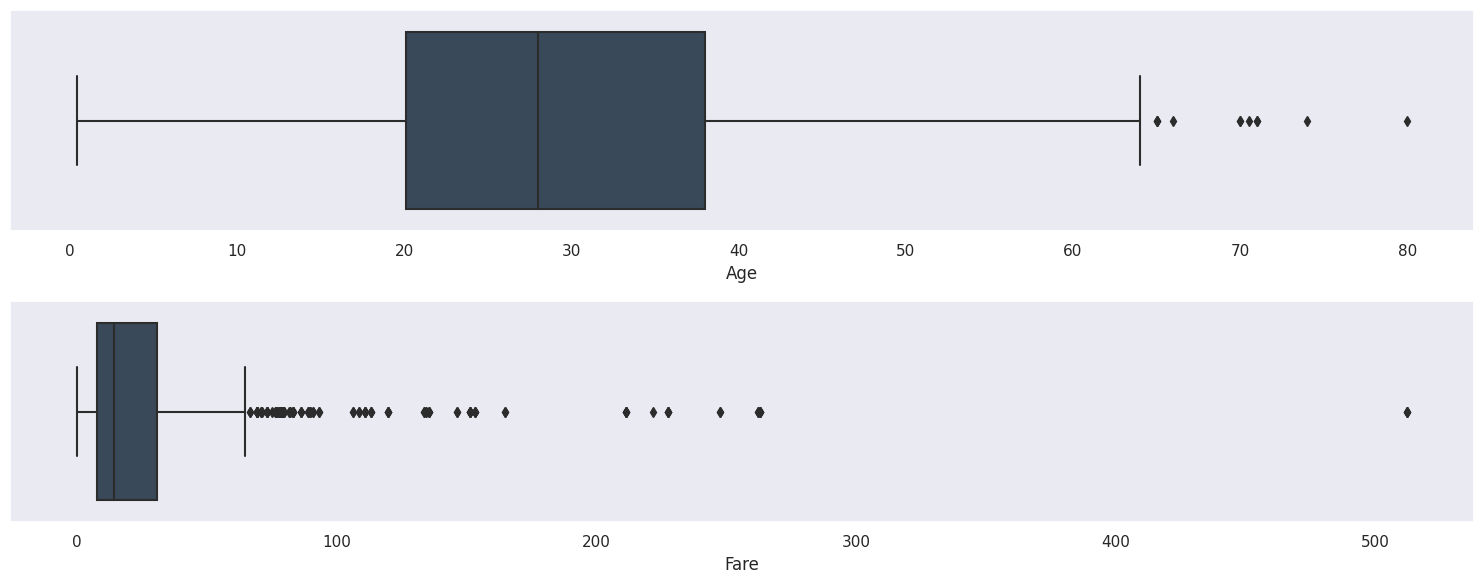

In [16]:
# Construindo boxplot com a distribuição das idades e dos valores das passagens
fig, (axis1, axis2) = plt.subplots(2,1, figsize = (15,6))
sns.boxplot(data = df, x = 'Age', ax = axis1)
sns.boxplot(data = df, x = 'Fare', ax = axis2)

plt.tight_layout()

#### **Proporção de sobreviventes por sexo**

No caso a seguir, verificamos que a proporção de homens (*male*) que sobreviveu foi menor do que a mulheres (*female*):

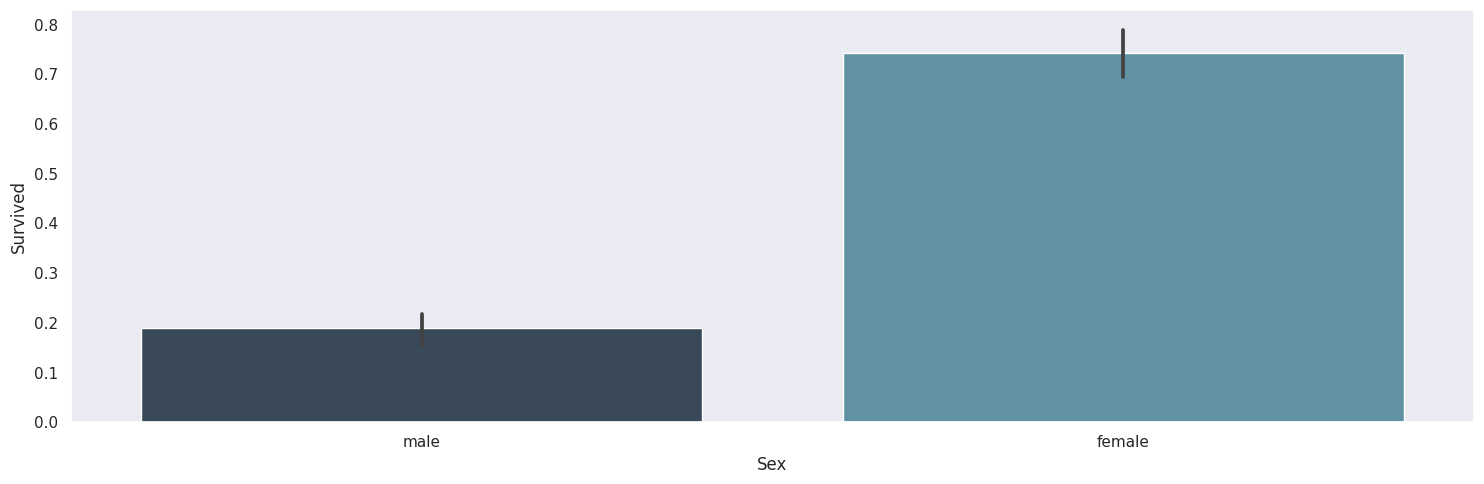

In [17]:
fig, (axis1) = plt.subplots(1, figsize = (15,5))

sns.barplot(data = df, x = 'Sex', y = 'Survived', ax = axis1)
plt.tight_layout()

#### **Proporção de sobreviventes por classe**

Uma análise ainda mais interessante é o número de sobreviventes por classe. O maior número de sobreviventes foi de passageiros da 1ª classe:

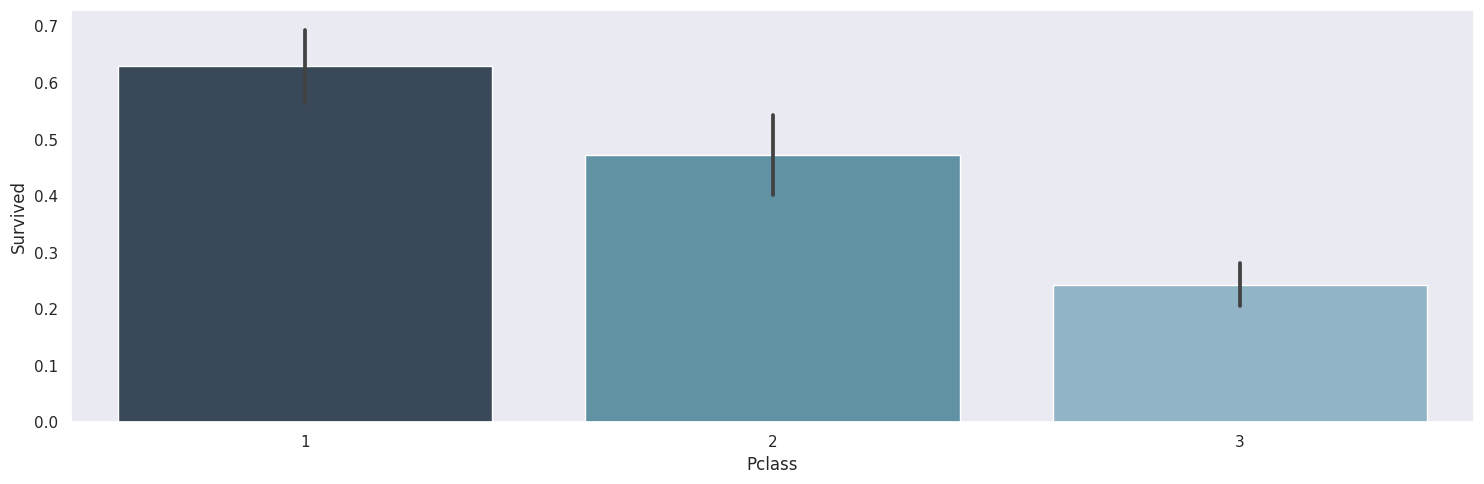

In [18]:
fig, (axis1) = plt.subplots(1, figsize = (15,5))
sns.barplot(data = df, x = 'Pclass', y = 'Survived', ax = axis1)

plt.tight_layout()

#### **Plotando mais variáveis juntas**

Podemos juntar mais variáveis para plotar gráficos mais ricos, como sobrevientes por:

1. idade;
2. classe; e
3. porto de embarque:

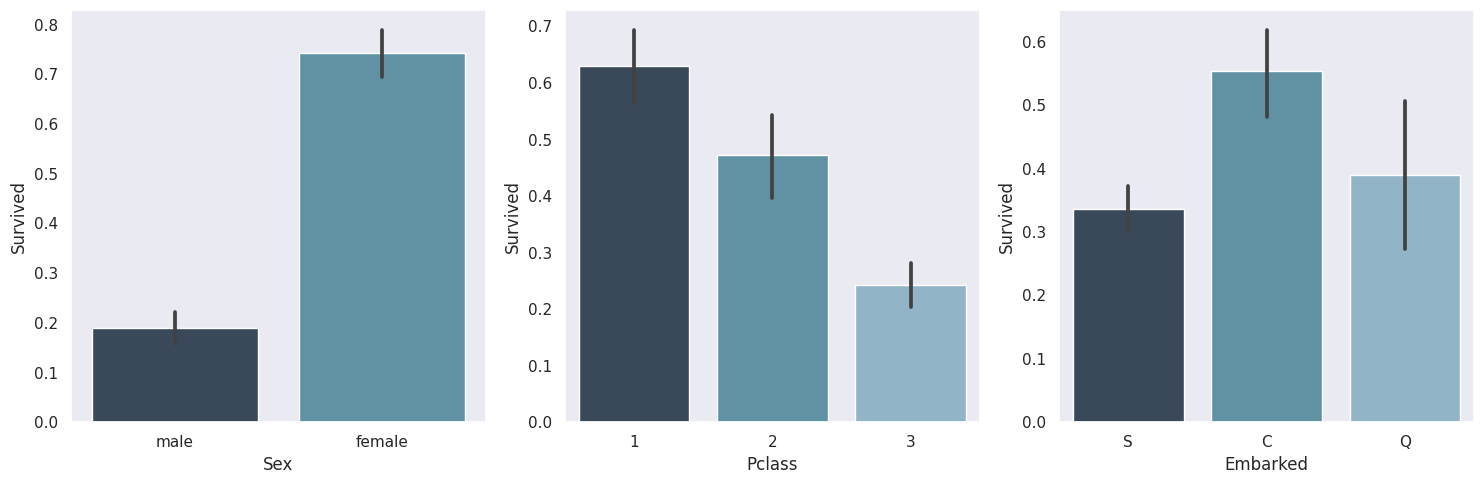

In [19]:
# plotando gráfico com a visão das 3 variáveis
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (15,5))

sns.barplot(data = df, x = 'Sex', y = 'Survived', ax = axis1)
sns.barplot(data = df, x = 'Pclass', y = 'Survived', ax = axis2)
sns.barplot(data = df, x = 'Embarked', y = 'Survived', ax = axis3)
plt.tight_layout()

A partir da análise dos três gráficos acima, podemos extrair algumas informações importantes:

* As mulheres têm muito mais chances de sobreviverem (75%) do que os homens (18%).

* Os passageiros que viajaram na 1ª classe possuem mais que o dobro de chances de sobreviverem em relação aos que viajaram na 3ª classe.

* O maior número de sobreviventes é da cidade de Cherbourgsão, enquanto o menor número é de Southampton.

#### **Sobrevivência detalhada por sexo**

Mais mulheres sobreviveram  ao desastre do que homens se considerarmos casos individuais, as classes e as cidades de embarque:

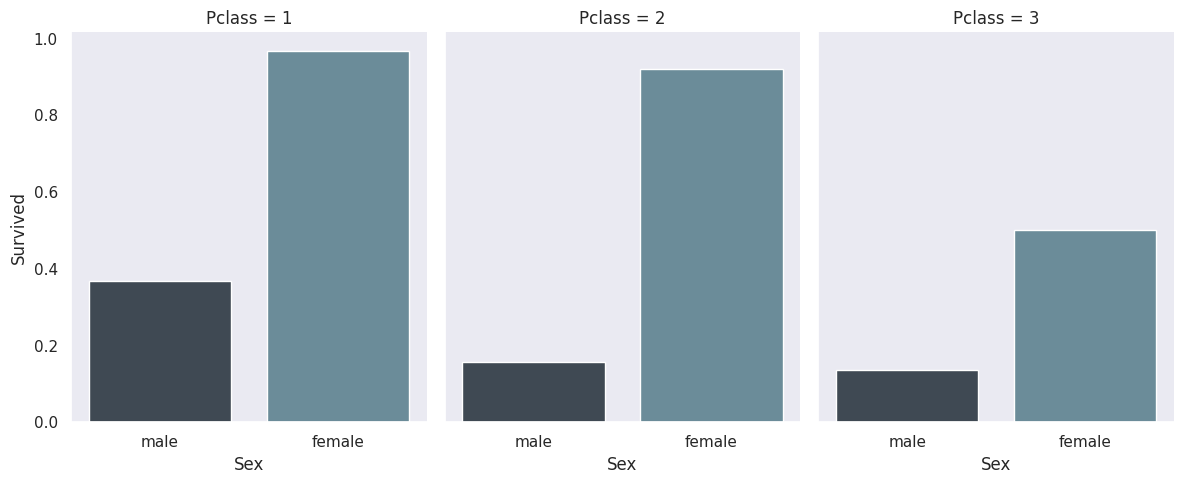

In [22]:
# Sobrevivência por sexo e classe
sns.catplot(x = "Sex", y = "Survived", col = "Pclass", data = df, saturation = .5, kind = "bar", errorbar=None, aspect = 0.8)
plt.tight_layout()

<ipython-input-21-5c043cc27eb9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x = "Sex", y = "Survived", col = "Embarked", data = df, saturation = .5, kind = "bar", ci = None, aspect = 0.8)


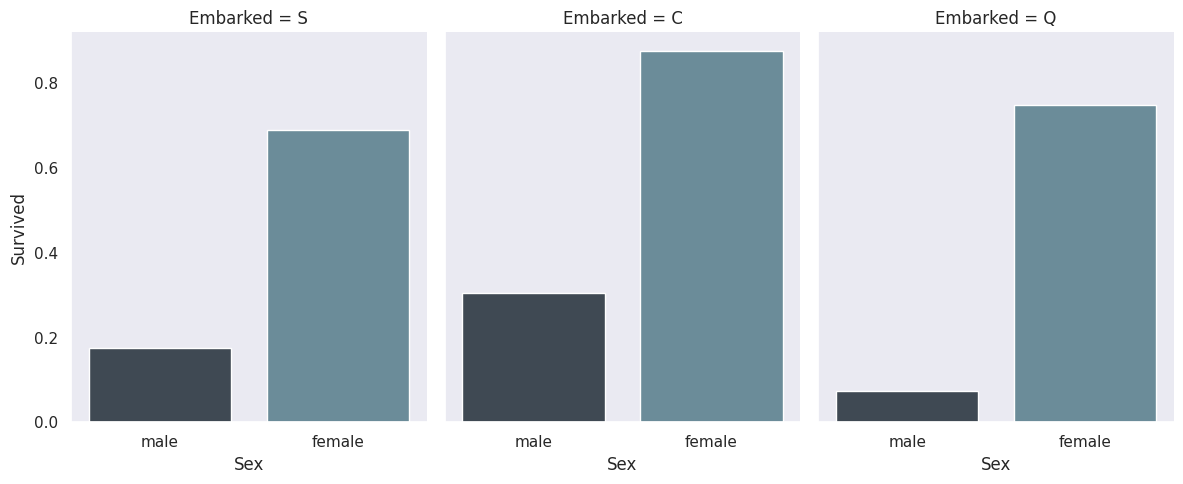

In [21]:
# Sobrevivência por sexo e porto de embarque
sns.catplot(x = "Sex", y = "Survived", col = "Embarked", data = df, saturation = .5, kind = "bar", ci = None, aspect = 0.8)
plt.tight_layout()

#### **Sobrevivência por idade dos passageiros**

O gráfico à esquerda mostra os não sobreviventes por idade; o gráfico à esquerda mostra os sobreviventes por idade:

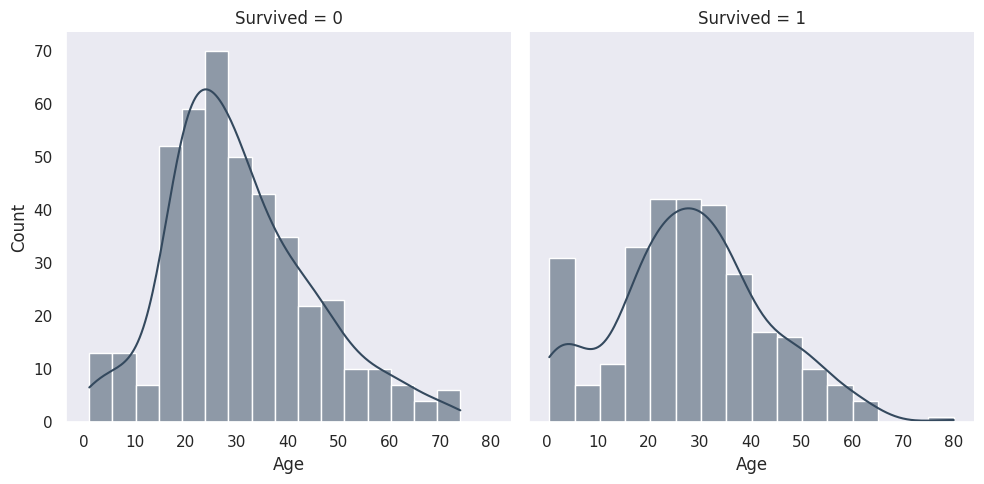

In [28]:
sns.FacetGrid(df, col = 'Survived', height = 5).map(sns.histplot, 'Age', kde=True)
plt.tight_layout()

Podemos perceber que a maior parte dos passageiros, sobreviventes ou não, possuiam idades entre 20 e 30 anos.

No gráfico da direita (sobreviventes), podemos perceber que há um pico nos passageiros que possuem idade de até 5 anos, mostrando que crianças um pouco menores tiveram mais chance de sobrevivência.


#### **Correlação das variáveis**

Por fim, mais um gráfico muito comum em análises estatísticas é o de correlação entre dados.

Correlação entre variáveis é entender de que forma uma impacta em outra.

A visualização gera um gráfico do tipo "Mapa de Calor" ou *heatmap*. Cores mais "claras" ou menos quentes representam baixa correlação. Cores mais "fortes" ou mais quentes representam alta correlação.

<ipython-input-29-da739803b7f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), fmt = '.2g', cmap = 'Purples', annot= True)


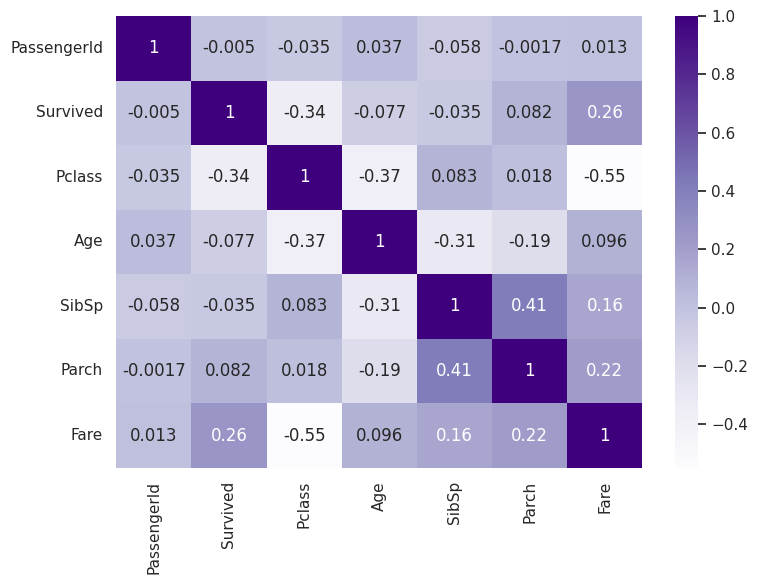

In [29]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(df.corr(), fmt = '.2g', cmap = 'Purples', annot= True)
plt.tight_layout()

As maiores correlações apresentadas foram entre as variáveis *Parch* (quantidade de pais e filhos a bordo) e *SibSp* (quantidade de cônjuges e irmãos a bordo), cujo valor é de 0,41.

## **Considerações finais**

Essa foi uma demonstração de análise de dados que podemos em Data Science.

Este tipo de análise é muito comum seja para extrair *insights* de conjuntos de dados, seja para entender tais conjuntos e melhorá-los para o uso em algoritmos de aprendizado de máquina (Machine Learning).

Sugerimos que você reveja esse notebook após a aula ou durante todo o curso como forma de fixar seus conceitos. Se você se sentir confiante, à medida que avança, pode voltar a essa demonstração e aprimorá-la com outras análises e visualizações dos dados.

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**